In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway
%matplotlib inline

In [24]:
# Credits:
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
# Archipelago (Antarctica) penguin data. R package version 0.1.0.
# https://allisonhorst.github.io/palmerpenguins/
url = 'https://gist.githubusercontent.com/slopp/'+ \
      'ce3b90b9168f2f921784de84fa445651/raw/' + \
      '4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
df = pd.read_csv(url)

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=400/>

**Image 1.** Penguins drawing. Artwork by @allison_hors.

In [7]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [20]:
# Show 10 observations
df.sample(10)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
242,243,Gentoo,Biscoe,47.5,15.0,218.0,4950.0,female,2009
240,241,Gentoo,Biscoe,47.5,14.0,212.0,4875.0,female,2009
67,68,Adelie,Biscoe,41.1,19.1,188.0,4100.0,male,2008
321,322,Chinstrap,Dream,50.8,18.5,201.0,4450.0,male,2009
37,38,Adelie,Dream,42.2,18.5,180.0,3550.0,female,2007
26,27,Adelie,Biscoe,40.6,18.6,183.0,3550.0,male,2007
68,69,Adelie,Torgersen,35.9,16.6,190.0,3050.0,female,2008
215,216,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,male,2008
207,208,Gentoo,Biscoe,45.0,15.4,220.0,5050.0,male,2008
98,99,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008


<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=400/>

**Image 2.** Penguins dimensions. Artwork by @allison_hors.

In [25]:
# Drop na values, but explain your rule of decision
df = df.dropna(subset = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])


In [26]:
# Get a basic summary of the data
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,172.701754,43.921930,17.151170,200.915205,4201.754386,2008.029240
std,99.174948,5.459584,1.974793,14.061714,801.954536,0.817168
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,87.250000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.750000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [28]:
# How many penguins by species and island we have?
df[['species', 'island']].value_counts()

species    island   
Gentoo     Biscoe       123
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     51
           Biscoe        44
dtype: int64

In [34]:
# Get the basic metrics (mean, median, std, max, min) per species
df.groupby('species').agg(['mean', 'median', 'std', 'max', 'min'])

/tmp/ipykernel_988/2334384418.py:2: FutureWarning: ['island', 'sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('species').agg(['mean', 'median', 'std', 'max', 'min'])


rowid                             bill_length_mm         \
                 mean median        std  max  min           mean median   
species                                                                   
Adelie      76.980132   77.0  43.768096  152    1      38.791391  38.80   
Chinstrap  310.500000  310.5  19.773720  344  277      48.833824  49.55   
Gentoo     214.032520  214.0  35.706209  276  153      47.504878  47.30   

                                 ...  body_mass_g                              \
                std   max   min  ...         mean  median         std     max   
species                          ...                                            
Adelie     2.663405  46.0  32.1  ...  3700.662252  3700.0  458.566126  4775.0   
Chinstrap  3.339256  58.0  40.9  ...  3733.088235  3700.0  384.335081  4800.0   
Gentoo     3.081857  59.6  40.9  ...  5076.016260  5000.0  504.116237  6300.0   

                          year                                
              min         mean  median       std   max   min  
species                                                       
Adelie     2850.0  2008.019868  2008.0  0.820327  2009  2007  
Chinstrap  2700.0  2007.970588  2008.0  0.863360  2009  2007  
Gentoo     3950.0  2008.073171  2008.0  0.791043  2009  2007  

[3 rows x 30 columns]

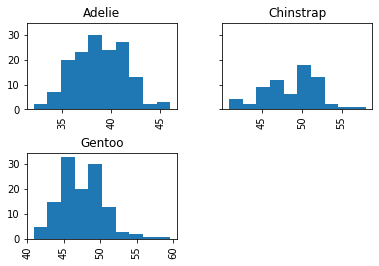

In [41]:
# Show the histogram per bill length
df.hist(column = 'bill_length_mm', by = 'species', sharey = True)
plt.show()

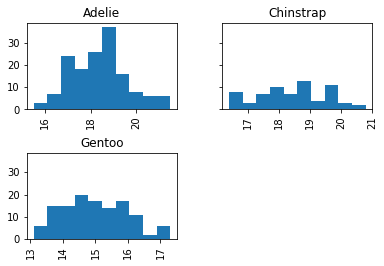

In [42]:
# Show the histogram per bill depth
df.hist(column = 'bill_depth_mm', by = 'species', sharey = True)
plt.show()

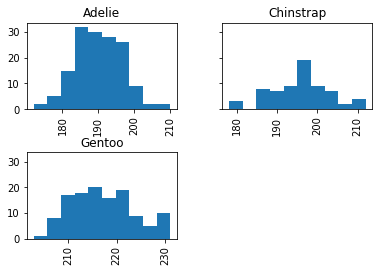

In [43]:
# Show the histogram per flipper length
df.hist(column = 'flipper_length_mm', by = 'species', sharey = True)
plt.show()

In [29]:
# Show a boxplot of body mass per species

In [30]:
# Show a bivariate plot of bill length and bill depth

In [31]:
# Is there a way to be more effective?


In [32]:
# What percentage of Gentoo penguins weights less than 5000 (visually)


In [33]:
# Is there a difference between Adelie penguins from each island?
# alpha = 0.05
# reject_H0 = p_value < alpha 

In [34]:
# Show the boxplot of Adelie penguins by island